### This is a document

come and **enjoy**

In [4]:
import requests
import json
from datetime import datetime, timedelta 
import time


In [ ]:
def get_hn_stories_by_keyword(keyword, months=2):
    """
    Retrieve Hacker News stories containing a keyword from the last N months

    Args:
        keyword (str): The keyword to search for
        months (int): Number of months to look back (default: 2)

    Returns:
        list: List of stories matching the criteria
    """

    # Calculate timestamp for N months ago
    two_months_ago = datetime.now() - timedelta(days=30 * months)
    timestamp = int(two_months_ago.timestamp())

    # Search Hacker News API
    search_url = "https://hn.algolia.com/api/v1/search_by_date"

    params = {
        'query': keyword,
        'tags': 'story',
        'numericFilters': f'created_at_i>{timestamp}',
        'hitsPerPage': 1000  # Maximum allowed
    }

    try:
        response = requests.get(search_url, params=params)
        response.raise_for_status()

        data = response.json()
        stories = data.get('hits', [])

        # Filter stories to ensure they contain the keyword in title or content
        filtered_stories = []
        for story in stories:
            title = story.get('title', '').lower()
            story_text = story.get('story_text', '').lower()
            keyword_lower = keyword.lower()

            if keyword_lower in title or keyword_lower in story_text:
                filtered_stories.append({
                    'title': story.get('title', 'No title'),
                    'url': story.get('url', f"https://news.ycombinator.com/item?id={story['objectID']}"),
                    'points': story.get('points', 0),
                    'comments': story.get('num_comments', 0),
                    'author': story.get('author', 'Unknown'),
                    'created_at': story.get('created_at', ''),
                    'hn_url': f"https://news.ycombinator.com/item?id={story['objectID']}"
                })

        return filtered_stories

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return []

def display_stories(stories):
    if not stories:
        print("No stories found matching the criteria.")
        return
    print(f"Found {len(stories)} stories matching the criteria:\n")
    print("-" * 80)

    for story in stories:
        print(f"Title: {story.get('title', 'No title')}")
        print(f"URL: {story.get('url', '')}")
        print(f"Author: {story.get('author', 'Unknown')}")
        print(f"Points: {story.get('points', 0)}, Comments: {story.get('num_comments', 0)}")
        print(f"Created At: {story.get('created_at', '')}")
        print("-" * 80)

In [18]:
data=get_hn_stories_by_keyword("fashion", months=2)
display_stories(data)

Found 27 stories matching the criteria:

--------------------------------------------------------------------------------
Title: Show HN: Digital Wardrobe – Track your daily outfit cost
URL: https://news.ycombinator.com/item?id=45003289
Author: Jasperio


KeyError: 'num_comments'

In [11]:
time_span=get_hh_stories("python")
print(time_span.timestamp())


1751343385.607998


In [ ]:
#Audio

In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.5/561.5 kB 2.9 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 2.2 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 2.4 MB/s  0:00:12m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [datasets]8/9 [datasets]ce-hub]


In [3]:
def get_data_files():
    data_files = pd.DataFrame()
    for subdir, dirs, files in os.walk('data'):
        for file in files:
            if not file == '.DS_Store':
                f_split = file.split('.')[0].split('-')
                tmp = pd.DataFrame({
                      'full_path':os.path.join(subdir, file)
                    , 'parent_path':subdir
                    , 'file_name': file
                    , 'actor_num': subdir.split('_')[1]
                    , 'modelity': modality[f_split[0]]
                    , 'vocal_channel': vocal_channel[f_split[1]]
                    , 'emotion': emotions[f_split[2]]
                    , 'emotional_intensity': emotional_intensity[f_split[3]]
                    , 'statement': statement[f_split[4]]
                    , 'repetition': repetition[f_split[5]]
                    , 'actor_gender': get_actor()[f_split[6]]
                }, index=[0])
                data_files = data_files.append(tmp, ignore_index=True, sort=False)    
    return data_files
    

In [5]:
!pip install numpy pandas librosa soundfile scikit-learn matplotlib tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 4.8 MB/s  0:00:01 eta 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 2.3 MB/s  0:00:03 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 MB 2.5 MB/s  0:01:30m0:00:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 kB 1.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 2.2 MB/s  0:00:02 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.8 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 2.6 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.4 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 2.1 MB/s  0:00:12m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.4 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 2.1 MB/s 

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import librosa
import soundfile as sf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt
import itertools



# --------- CONFIG ----------
#import drive
# from google.colab import drive
# drive.mount('/content/drive')


DATA_PATH = "/kaggle/input/ravdess-emotional-speech-audio"   # <-- set this to where your WAV files are
SR = 22050                    # sampling rate for librosa.load
N_MFCC = 40                   # number of MFCC coefficients
MAX_PAD_LEN = 174             # number of time frames to pad/truncate to (tunable)
BATCH_SIZE = 32
EPOCHS = 40
TEST_SIZE = 0.2
RANDOM_STATE = 42
MODEL_OUT = "ravdess_ser_cnn.h5"
# ---------------------------

# RAVDESS emotion mapping (filename 3rd field)
EMOTIONS = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

def extract_emotion_from_filename(filename):
    # filename is e.g. .../03-01-05-01-02-01-12.wav
    base = os.path.basename(filename)
    parts = base.split('.')[0].split('-')
    if len(parts) < 3:
        return None
    emo_code = parts[2]
    return EMOTIONS.get(emo_code)

def pad_or_truncate(mfcc, max_len=MAX_PAD_LEN):
    # mfcc shape: (n_mfcc, time)
    if mfcc.shape[1] < max_len:
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0,0),(0,pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    return mfcc

def extract_features(file_path, sr=SR, n_mfcc=N_MFCC, max_pad_len=MAX_PAD_LEN):
    # load audio
    try:
        y, sr = librosa.load(file_path, sr=sr)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None
    # compute MFCCs
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    # compute deltas
    delta = librosa.feature.delta(mfcc)
    delta2 = librosa.feature.delta(mfcc, order=2)
    # stack MFCC + delta + delta2 (resulting in channels = 3)
    stacked = np.vstack([mfcc, delta, delta2])  # shape (n_mfcc*3, time)
    # pad / truncate in time dimension
    stacked = pad_or_truncate(stacked, max_pad_len)
    return stacked



def load_dataset(data_path):
    pattern = os.path.join(data_path, '**', '*.wav')
    files = glob.glob(pattern, recursive=True)
    print(f"Found {len(files)} wav files.")
    X, Y = [], []
    for f in files:
        emo = extract_emotion_from_filename(f)
        if emo is None:
            continue
        feat = extract_features(f)
        if feat is None:
            continue
        X.append(feat)
        Y.append(emo)
    X = np.array(X)
    Y = np.array(Y)
    print("X shape (num_samples, features, time):", X.shape)
    return X, Y

def build_cnn_model(input_shape, num_classes):
    # input_shape: (channels, time) where channels = n_mfcc*3
    # We'll treat input as "image" with shape (channels, time, 1)
    inp = layers.Input(shape=(input_shape[0], input_shape[1], 1))
    x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2,2))(x)

    x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2,2))(x)

    x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2,2))(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    out = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=inp, outputs=out)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cm = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis] + 1e-8)
    plt.figure(figsize=(8,6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        val = f"{cm[i, j]:.2f}" if normalize else f"{int(cm[i, j])}"
        plt.text(j, i, val,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

def main():
    X, Y = load_dataset(DATA_PATH)

    # limit classes if you want (example: use only a subset). Here we use all 8 emotions.
    labels = np.unique(Y)
    print("Emotions in data:", labels)

    # reshape X for CNN: currently (N, features, time) -> convert to (N, features, time, 1)
    X = X[..., np.newaxis]

    # encode labels
    le = LabelEncoder()
    y_encoded = le.fit_transform(Y)
    num_classes = len(le.classes_)
    y_cat = tf.keras.utils.to_categorical(y_encoded, num_classes=num_classes)

    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_cat, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y_encoded
    )

    print("Train shape:", X_train.shape, y_train.shape)
    print("Test shape:", X_test.shape, y_test.shape)

    # build model
    input_shape = (X.shape[1], X.shape[2])  # (features, time)
    model = build_cnn_model((input_shape[0], input_shape[1]), num_classes)
    model.summary()

    # callbacks
    cb = [
        callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
        callbacks.ModelCheckpoint(MODEL_OUT, save_best_only=True, monitor='val_loss')
    ]

    history = model.fit(
        X_train,
        y_train,
        validation_split=0.1,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=cb,
        verbose=1
    )

    # evaluate
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test loss: {loss:.4f}, Test accuracy: {acc:.4f}")


    cnn_result = {'Model': 'CNN', 'Test Accuracy': acc, 'Test Loss': loss}


    # predictions and classification report
    y_pred = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test, axis=1)

    print("Classification report:")
    print(classification_report(y_true_labels, y_pred_labels, target_names=le.classes_))

    # confusion matrix
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    plot_confusion_matrix(cm, classes=le.classes_, normalize=False, title='Confusion matrix (counts)')
    plot_confusion_matrix(cm, classes=le.classes_, normalize=True, title='Confusion matrix (normalized)')

    # plot training history
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend(); plt.title('Loss')
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.legend(); plt.title('Accuracy')
    plt.show()


NameError: name 'pd' is not defined

In [ ]:
from datasets import load_dataset

ds = load_dataset("MahiA/RAVDESS", cache_dir="/Volumes/Crucial X9/data")

In [ ]:
labels=ds["train"].features["classname"]
labels


Value('string')
<class 'datasets.features.features.Value'>


In [ ]:
print(ds["train"][0])
labels=set(ds["train"]["classname"])

print(f"The labels in the datare: {labels}")


{'path': 'audios/03-02-06-02-02-01-03.wav', 'classname': 'fearful'}
{'neutral', 'calm', 'happy', 'surprised', 'disgust', 'fearful', 'sad', 'angry'}
<class 'set'>


In [25]:
from collections import Counter

# Count occurrences of each label
label_counts = Counter(ds["train"]["classname"])
print("Label distribution:")
for label, count in label_counts.items():
    print(f"{label}: {count} samples")

Label distribution:
fearful: 301 samples
sad: 301 samples
calm: 301 samples
surprised: 153 samples
angry: 301 samples
happy: 301 samples
neutral: 150 samples
disgust: 153 samples


<BarContainer object of 8 artists>

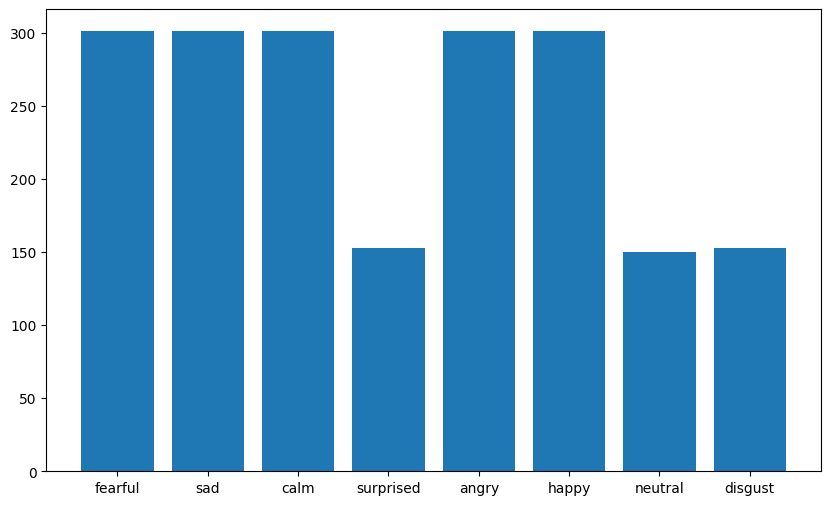

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel("Classname labels")
plt.ylabel("Number of samples")



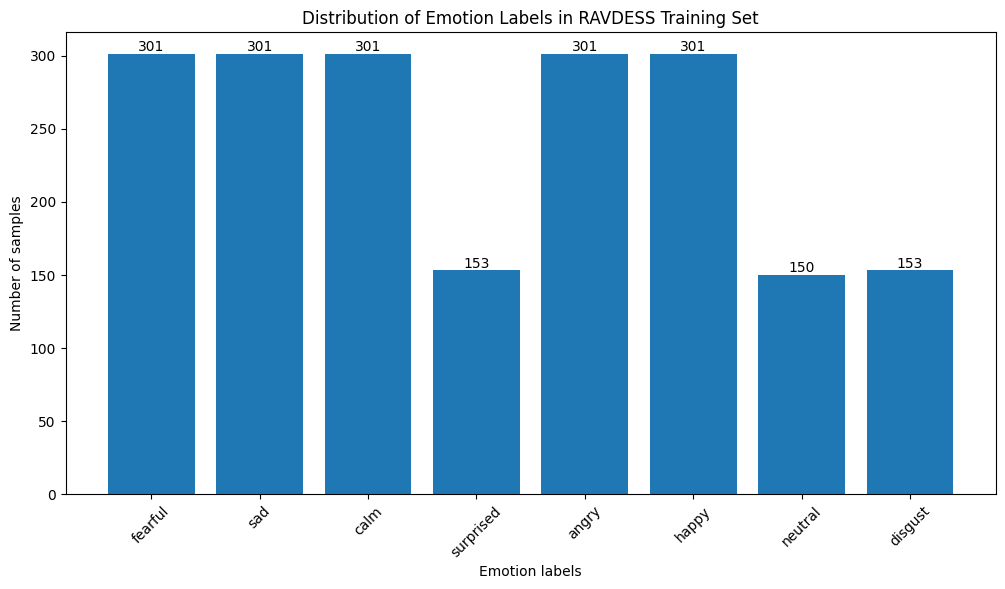

In [ ]:


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bars=plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel("Emotion labels")
plt.ylabel("Number of samples")
plt.title("Distribution of Emotion Labels in RAVDESS Training Set")
plt.xticks(rotation=45)

for bar in bars:
    height=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, height+0.1, 
    f'{int(height)}', ha="center", va="bottom")

plt.tight_layout()
plt.show()

In [43]:
!pip install Gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 MB 2.2 MB/s  0:00:27m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.7/815.7 kB 2.2 MB/s  0:00:0036m-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 3.3 MB/s  0:00:03 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18/18 [Gradio]17/18 [Gradio]]


In [55]:
def greet(name, intensity):
    return "Hello " + name + "!" * int(intensity)

demo=gr.Interface(
    fn=greet,
    inputs=["text", gr.Slider(1, 10)],
    outputs="text"  
)

In [ ]:
demo.launch(share=True, debug=True)

* Running on local URL:  http://127.0.0.1:7864
* To create a public link, set `share=True` in `launch()`.


In [2]:
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 7.7 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 3.0 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [transformers] [transformers]


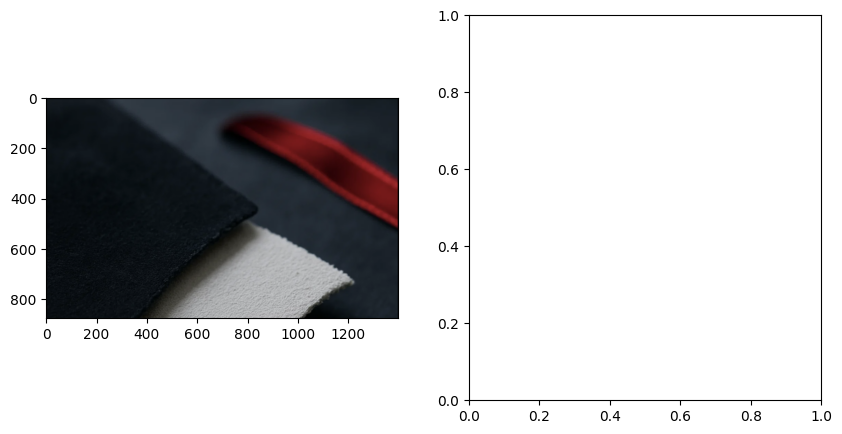

In [2]:
#import gradio as gr
#from transformers import pipeline
from PIL import Image
import matplotlib.pyplot as plt

#clf=pipeline("image-classification", model="google/vit-base-patch16-224")

image_path="/Users/e5028514/Desktop/Hero.png"

image=Image.open(image_path)

fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(image)

In [ ]:
import gradio as gr
import tensorflow as tf
from PIL import Image
import numpy as np

# Load your model (example with a simple function)
def predict_image(image):
    # This mocks-up the actual prediction to keep the example simple
    image = image.resize((224, 224))
    image_array = np.array(image) / 255.0
    # Simulate prediction
    return {"Cat": 0.7, "Dog": 0.3}

with gr.Blocks(title="Animal Classifier") as demo:
    gr.Markdown("# 🐾 Animal Classifier")
    gr.Markdown("Upload an image to classify as cat or dog.")

    image_input = gr.Image(type="pil", label="Upload Image")
    predict_btn = gr.Button("Classify")
    output_label = gr.Label()

    predict_btn.click(
        fn=predict_image,
        inputs=image_input,
        outputs=output_label
    )

demo.launch(debug=True)

In [48]:
!pip install soundfile huggingface_hub

In [ ]:
import soundfile as sf
from huggingface_hub import hf_hub_download

def load_audio(example):
    """ Load audio files using paths in the dataset"""
    file_path=example["path"]
    audio_path=hf_hub_download(
        repo_id="MahiA/RAVDESS",
        filename=file_path,
        repo_type="dataset"
    )
    audio_data, samplerate=sf.read(audio_path)
    return samplerate, audio_data

def generate_audio():
    example=ds["train"][0]
    samplerate, audio_data=load_audio(example)
    return example["classname"], (samplerate, audio_data)

with gr.Blocks() as demo:
    with gr.Column():
        for _ in range(4):
            audio=generate_audio()
            output=gr.Audio(audio, label="Audio Player")
demo.launch()



/Users/e5028514/venvs/llm_course/lib/python3.12/site-packages/gradio/processing_utils.py:777: UserWarning: Trying to convert audio automatically from float64 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))


* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.


In [ ]:
import gradio as gr
from datasets import load_dataset
import soundfile as sf
from huggingface_hub import hf_hub_download

# Load the dataset
dt = load_dataset("MahiA/RAVDESS")

def load_audio_from_path(example):
    """Load audio from file path"""
    file_path = example["path"]
    
    # Download and load the audio file
    audio_path = hf_hub_download(
        repo_id="MahiA/RAVDESS",
        filename=file_path,
        repo_type="dataset"
    )
    
    # Read the audio file
    data, samplerate = sf.read(audio_path)
    return samplerate, data

def generate_audio():
    example = dt["train"].shuffle()[0]
    samplerate, audio_array = load_audio_from_path(example)
    emotion = example.get("classname", "Unknown")
    return f"Emotion: {emotion}", (samplerate, audio_array)

with gr.Blocks() as demo:
    with gr.Column():
        gr.Markdown("# 🎵 RAVDESS Audio Samples")
        
        # Create 4 separate audio players with their own generate buttons
        for i in range(4):
            with gr.Row():
                with gr.Column(scale=1):
                    gen_btn = gr.Button(f"Generate Sample {i+1}", variant="secondary")
                with gr.Column(scale=2):
                    info_text = gr.Textbox(label="Info", interactive=False)
                with gr.Column(scale=3):
                    audio_output = gr.Audio(label=f"Sample {i+1}", interactive=False)
            
            # Connect each button to its corresponding outputs
            gen_btn.click(
                fn=generate_audio,
                outputs=[info_text, audio_output]
            )

demo.launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


/Users/e5028514/venvs/llm_course/lib/python3.12/site-packages/gradio/processing_utils.py:777: UserWarning: Trying to convert audio automatically from float64 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))
/Users/e5028514/venvs/llm_course/lib/python3.12/site-packages/gradio/processing_utils.py:777: UserWarning: Trying to convert audio automatically from float64 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))


In [47]:
import gradio as gr

def generate_audio():
    example=ds["train"].shuffle()[0]
    audio=example["audio"]
    return (audio_data["sampling_rate"], audio["array"])

with gr.Blocks() as demo:
    with gr.Column():
        for _ in range(4):
            audio=generate_audio()
            output=gr.Audio(value=audio, label="Generated Audio")
demo.launch()


KeyError: 'audio'

In [9]:
ds["train"].features

{'path': Value('string'), 'classname': Value('string')}

In [20]:
audio_track=ds["train"][0]
audio_track


{'path': 'audios/03-02-06-02-02-01-03.wav', 'classname': 'fearful'}